<h4>Table of content</h4>
<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">3- Data Exploring</p>
<p dir="ltr">4- Data Splitting</p>
<p dir="ltr"></p>
<ol>
    <li>Split the data</li>
</ol>
<p></p>
<p dir="ltr">5- Model training</p>
<p dir="ltr"></p>
<ol>
    <li>Random Forest</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
</ol>
<p></p>
<p dir="ltr">6- Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>Accuracy</li>
    <li>F1 Score</li>
    <li>Recall</li>
    <li>Precision</li>
    <li>Confusion Matrix</li>
</ol>
<p>7- Model Comparison&nbsp;</p>
<p></p>

In [3]:
# Dataset link to download: Dataset is publicly available
# at http://www.unb.ca/cic/datasets/IDS2017.html

## Importing the libraries


In [232]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [233]:
df=pd.read_csv("data/DDos.csv")

## Data Preprocessing

In [234]:
df.head(3)

,dst_port,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,cwe_flag_count,Label
0,54865,3,4.000000e+06,666666.66670,666666.666700,0.000000,2,0,12,0,...,0,0,6.0,0.0,2,0,12,0,0,BENIGN
1,55054,109,1.100917e+05,18348.62385,9174.311927,9174.311927,1,1,6,6,...,0,0,6.0,6.0,1,1,6,6,0,BENIGN
2,55055,52,2.307692e+05,38461.53846,19230.769230,19230.769230,1,1,6,6,...,0,0,6.0,6.0,1,1,6,6,0,BENIGN


In [235]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [236]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

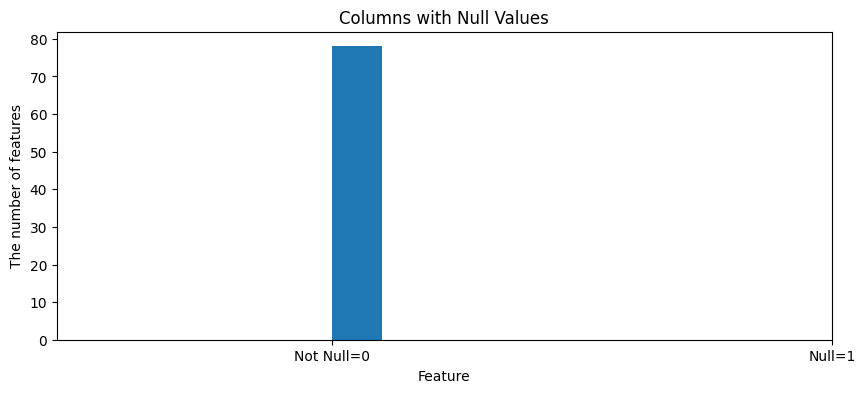

In [237]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


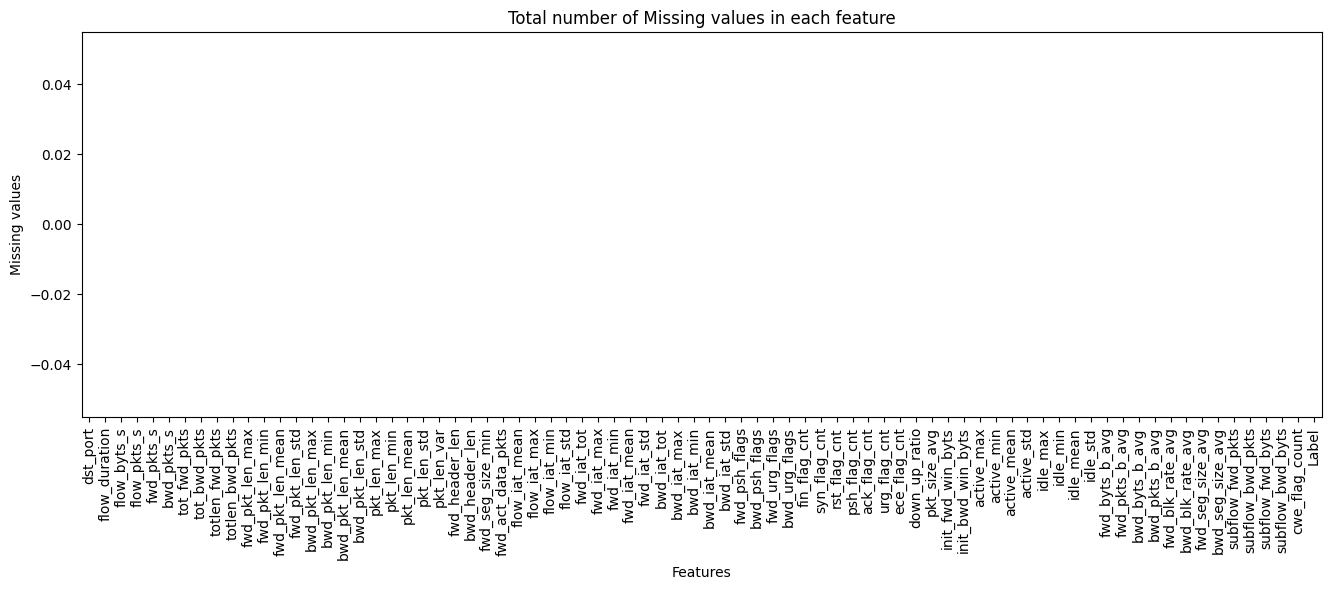

In [238]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)


In [239]:
## Removing the null values
data_f=df.dropna()

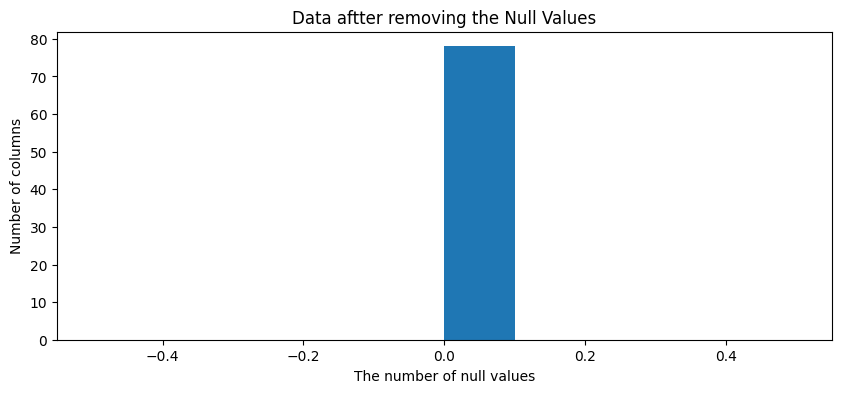

In [240]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()


In [241]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

C:\Users\Abhij\AppData\Local\Temp\ipykernel_4972\783324428.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [242]:
# To know the data types of the columns

(data_f.dtypes=='object')

dst_port            False
flow_duration       False
flow_byts_s         False
flow_pkts_s         False
fwd_pkts_s          False
                    ...  
subflow_bwd_pkts    False
subflow_fwd_byts    False
subflow_bwd_byts    False
cwe_flag_count      False
Label                True
Length: 78, dtype: bool

In [243]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

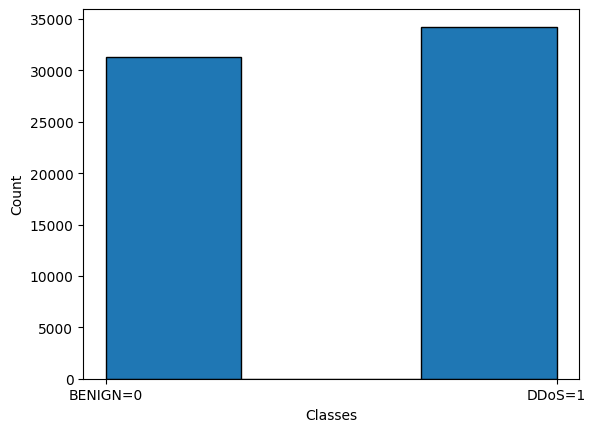

In [244]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## Data exploring

In [245]:
df.describe()

,dst_port,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,...,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,cwe_flag_count
count,65533.000000,6.553300e+04,6.553300e+04,6.553300e+04,6.553300e+04,6.553300e+04,65533.000000,65533.000000,65533.000000,6.553300e+04,...,65533.0,65533.0,65533.0,65533.000000,65533.000000,65533.000000,65533.000000,65533.000000,6.553300e+04,65533.0
mean,6523.085896,1.376272e+07,9.660890e+05,1.558510e+05,1.656169e+04,1.953889e+03,5.182931,5.131811,702.711977,6.693907e+03,...,0.0,0.0,0.0,111.823905,861.660665,5.182931,5.131811,702.711977,6.693907e+03,0.0
std,16787.279228,2.805083e+07,2.520138e+07,1.171885e+07,1.299813e+05,2.181304e+04,16.962453,23.923081,3246.621981,4.244953e+04,...,0.0,0.0,0.0,402.377868,1095.220145,16.962453,23.923081,3246.621981,4.244953e+04,0.0
min,0.000000,0.000000e+00,0.000000e+00,3.120535e-02,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.0
25%,80.000000,4.940600e+04,1.799777e+01,7.170651e-01,5.148777e-01,5.606821e-02,2.000000,1.000000,26.000000,0.000000e+00,...,0.0,0.0,0.0,6.000000,0.000000,2.000000,1.000000,26.000000,0.000000e+00,0.0
50%,80.000000,9.799470e+05,2.623334e+03,7.962417e+00,3.300428e+00,3.259605e+00,3.000000,4.000000,30.000000,1.980000e+02,...,0.0,0.0,0.0,8.666667,103.000000,3.000000,4.000000,30.000000,1.980000e+02,0.0
75%,80.000000,7.571807e+06,2.591217e+04,8.939480e+01,4.324044e+01,3.227785e+01,5.000000,5.000000,66.000000,1.160100e+04,...,0.0,0.0,0.0,35.000000,1934.500000,5.000000,5.000000,66.000000,1.160100e+04,0.0
max,61538.000000,1.199983e+08,2.070000e+09,1.000000e+09,3.000000e+06,2.000000e+06,1681.000000,2942.000000,120783.000000,4.991419e+06,...,0.0,0.0,0.0,3867.000000,3867.000000,1681.000000,2942.000000,120783.000000,4.991419e+06,0.0


#### Plot the distribution of the features:

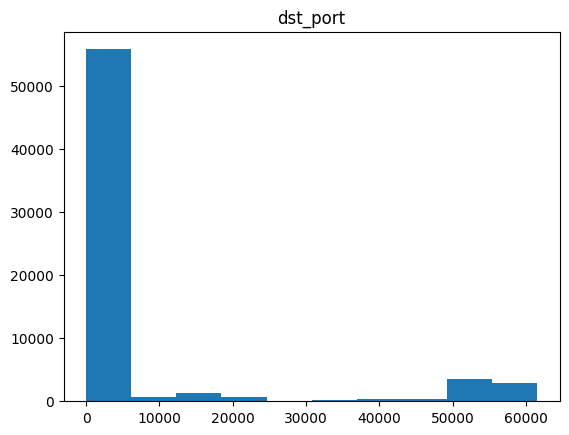

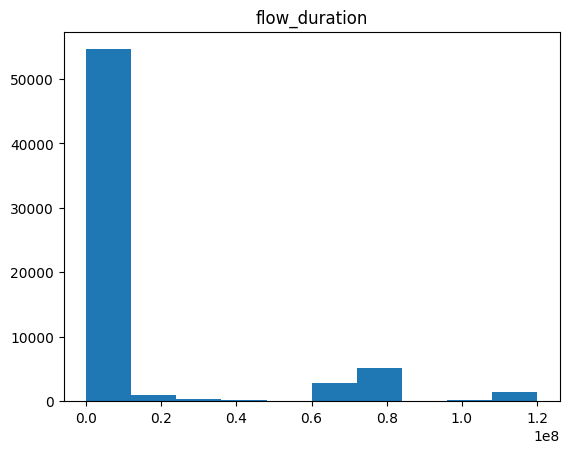

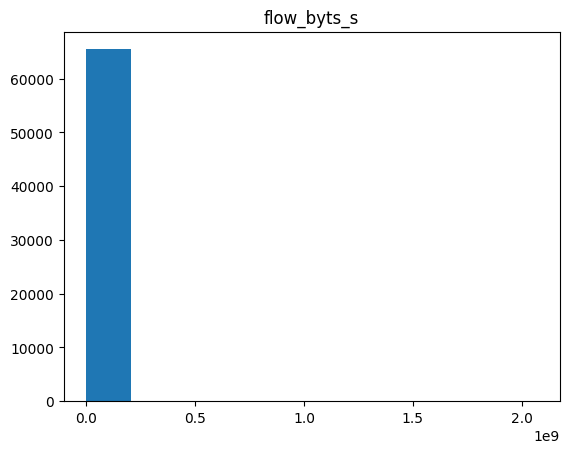

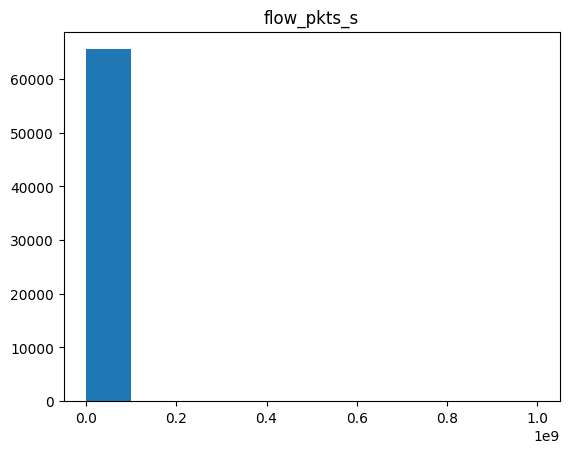

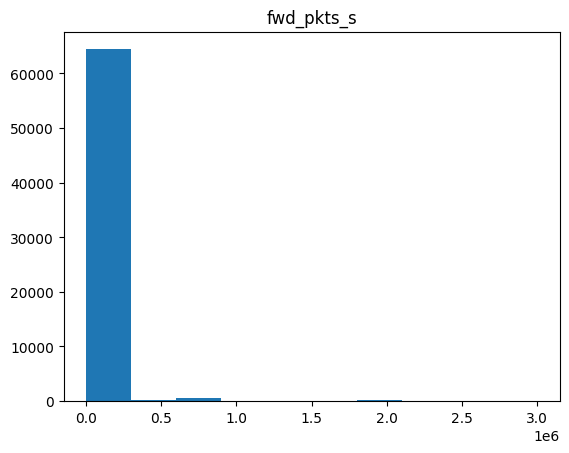

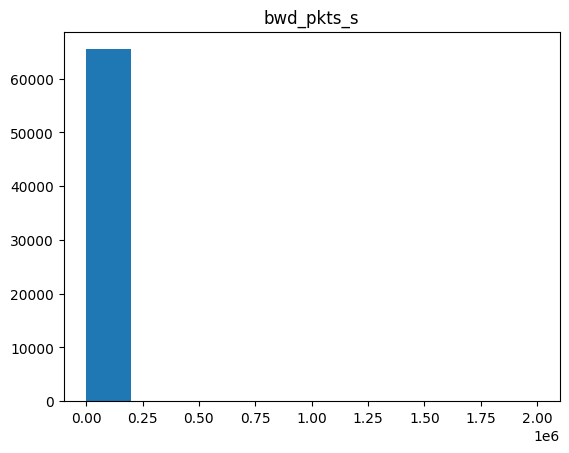

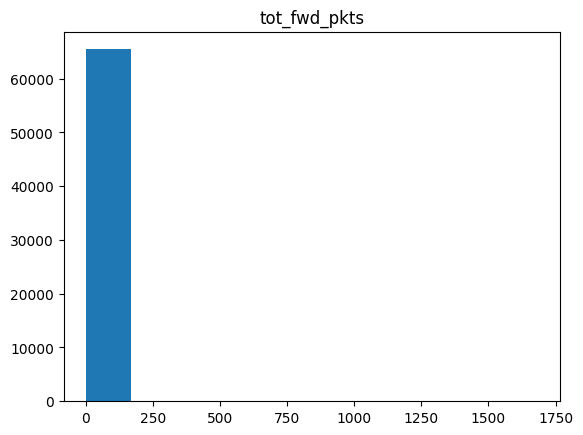

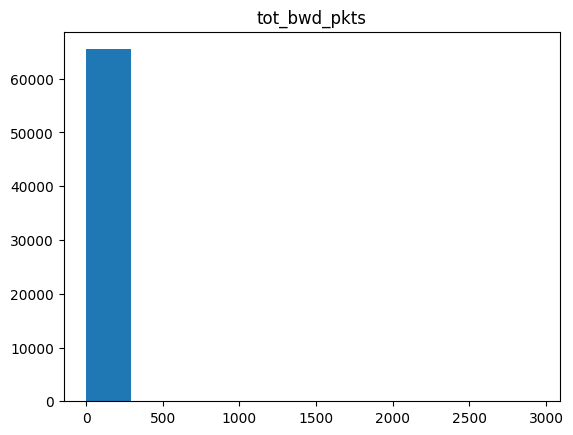

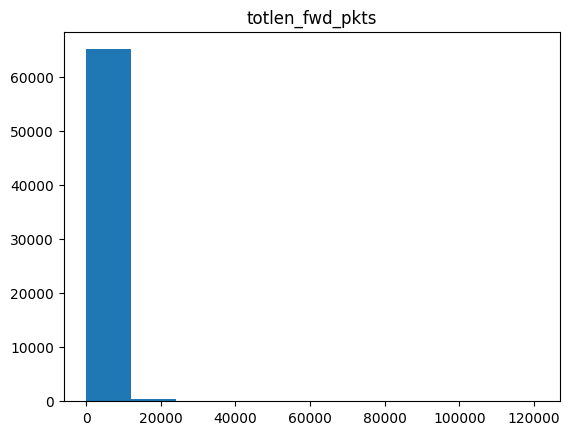

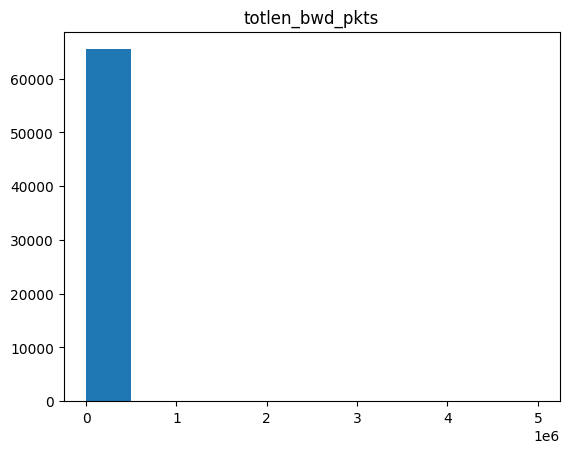

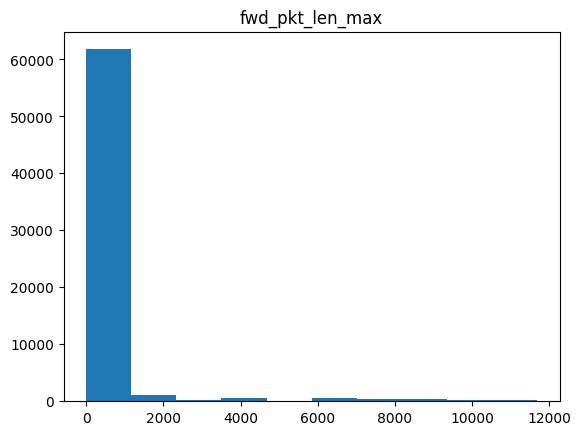

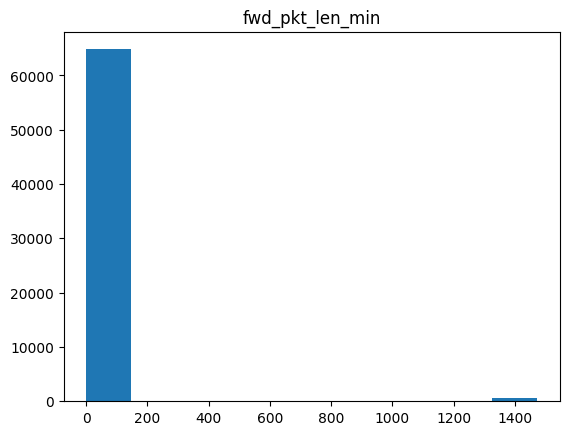

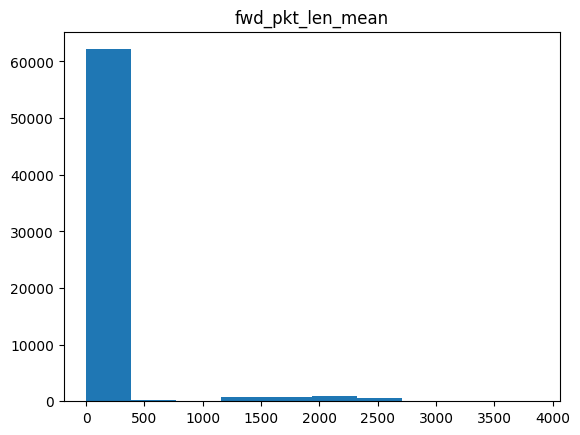

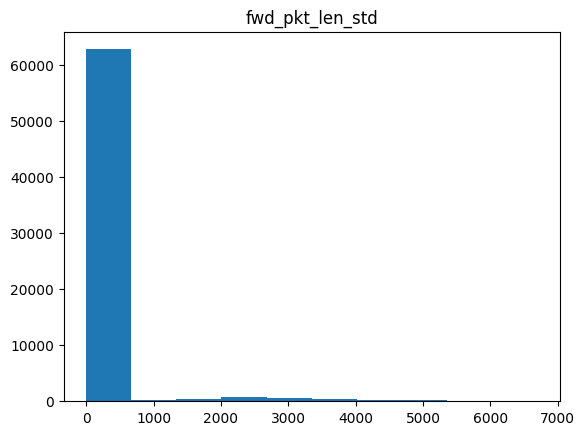

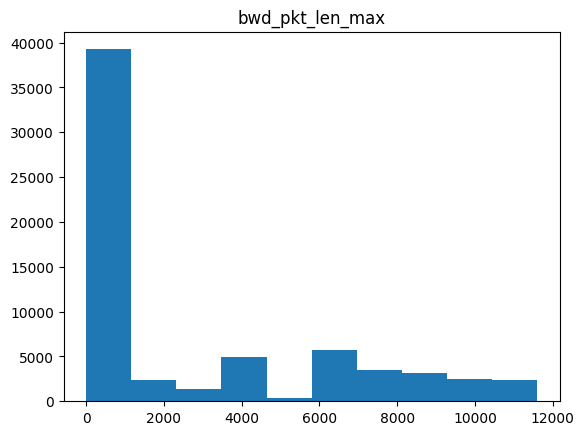

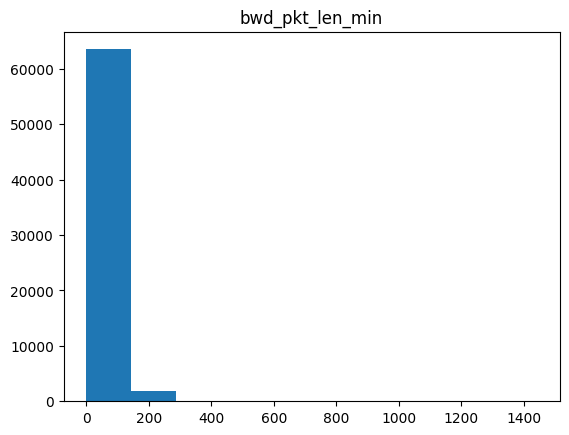

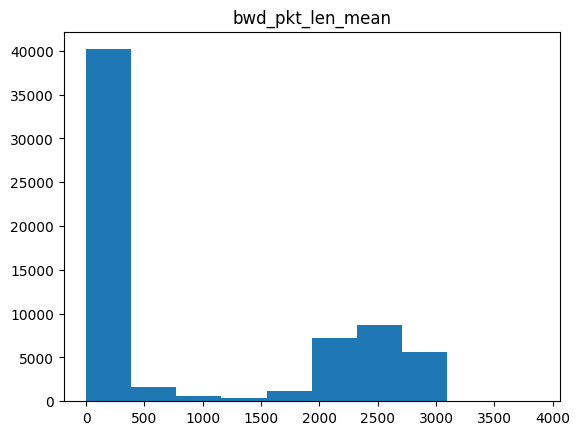

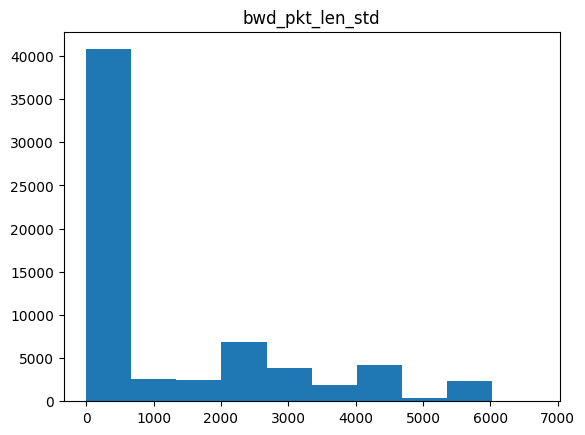

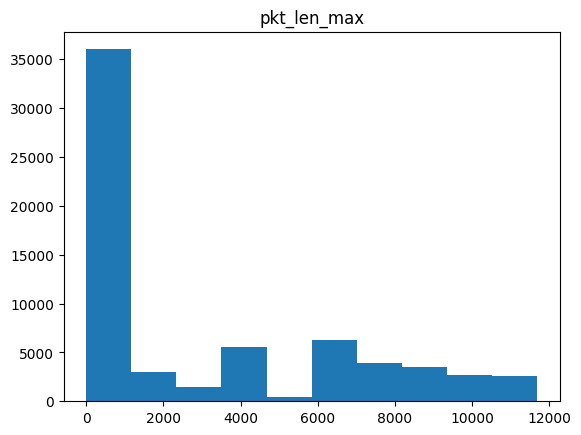

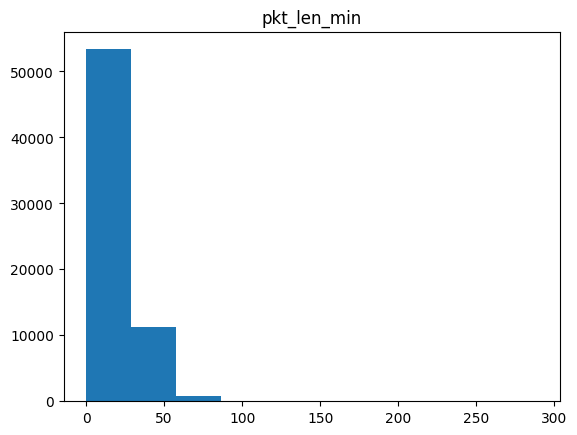

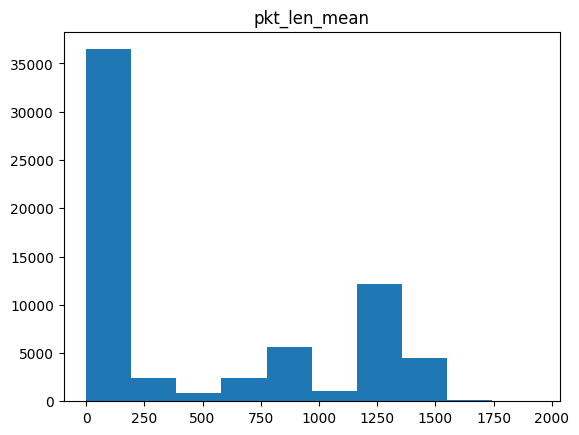

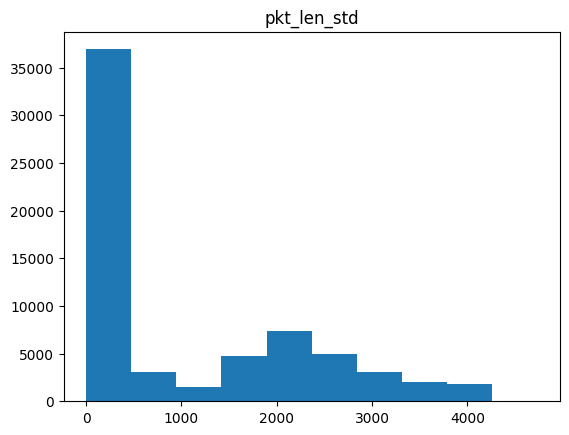

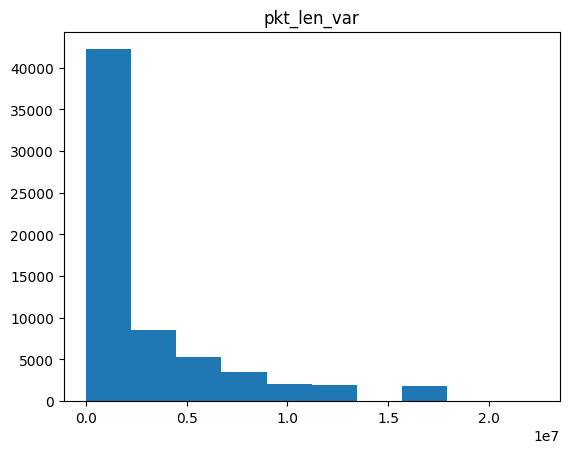

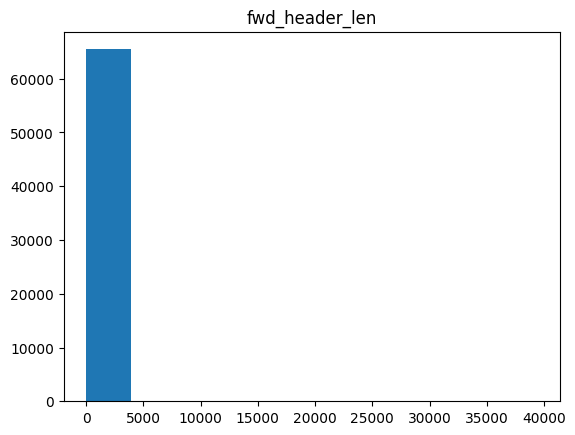

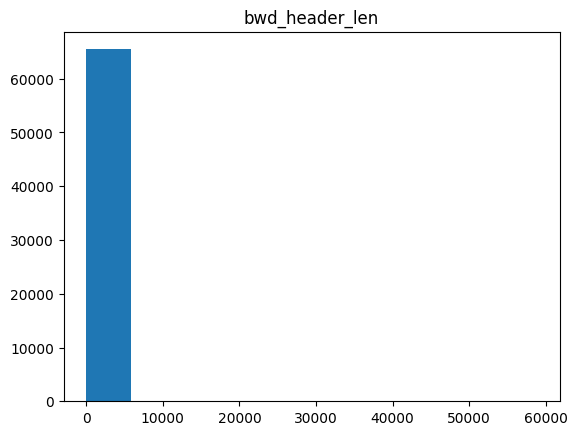

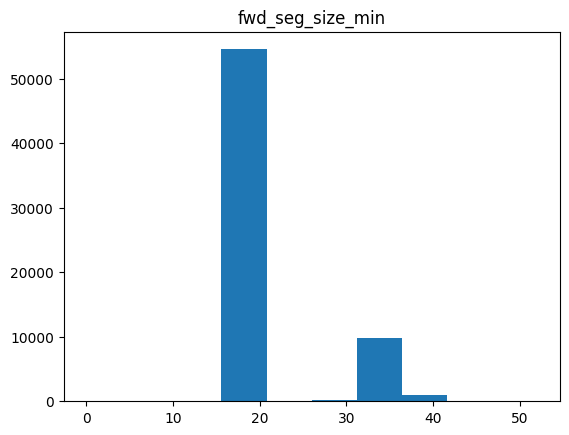

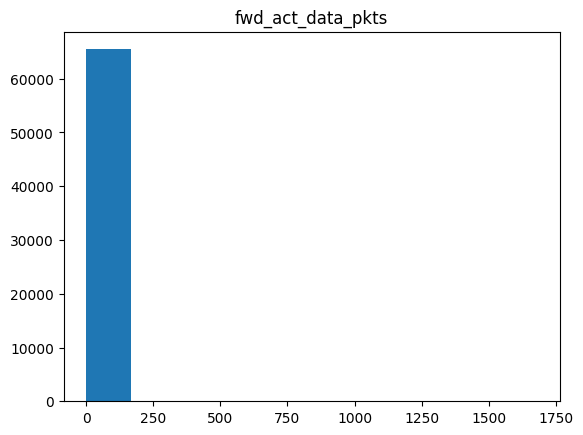

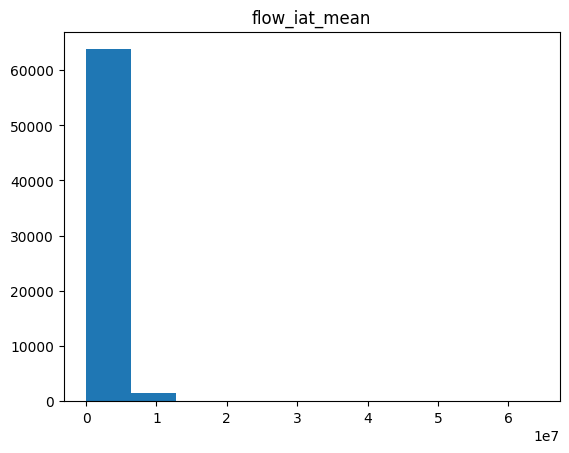

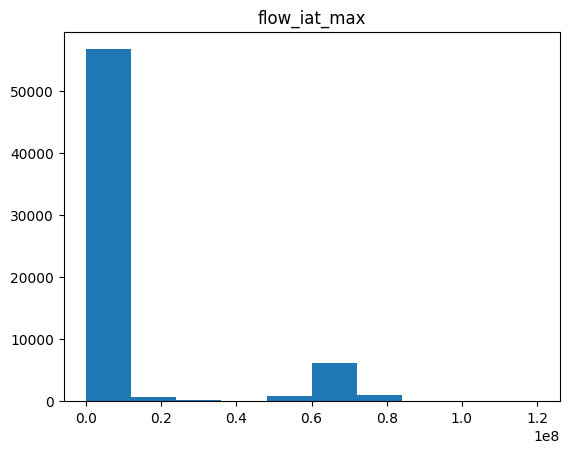

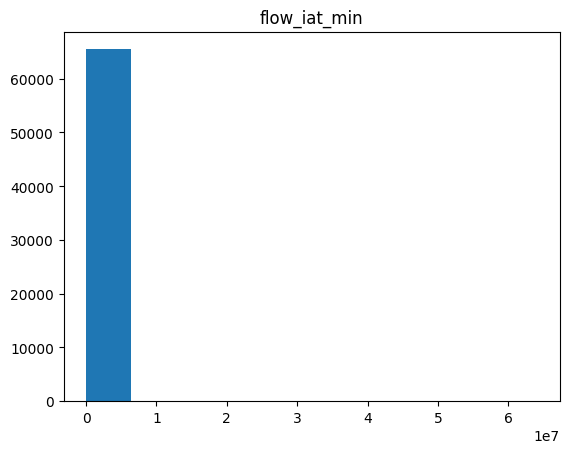

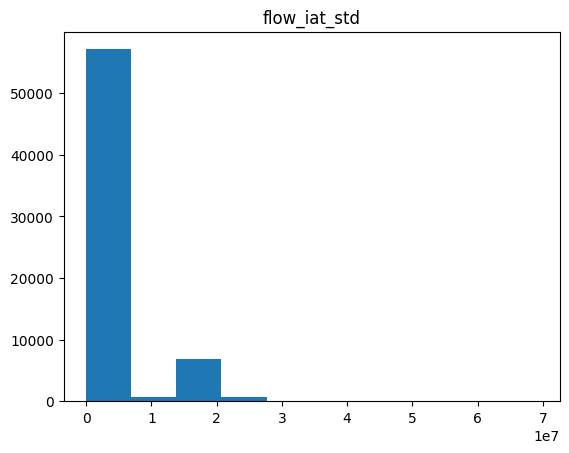

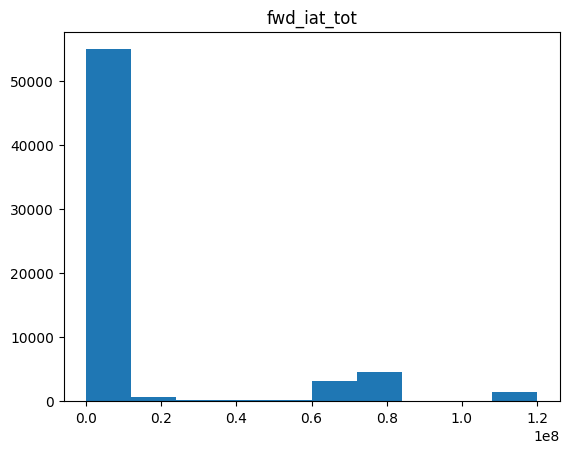

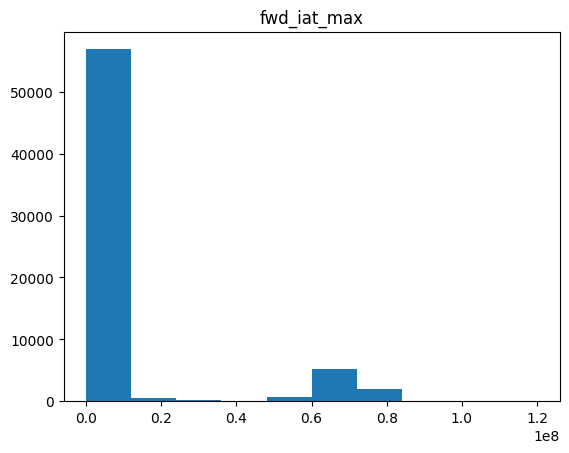

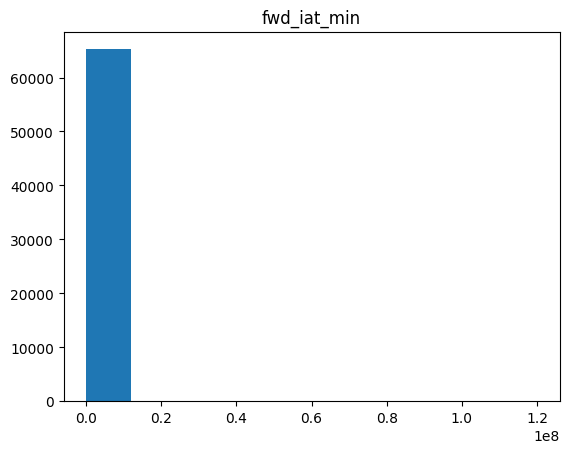

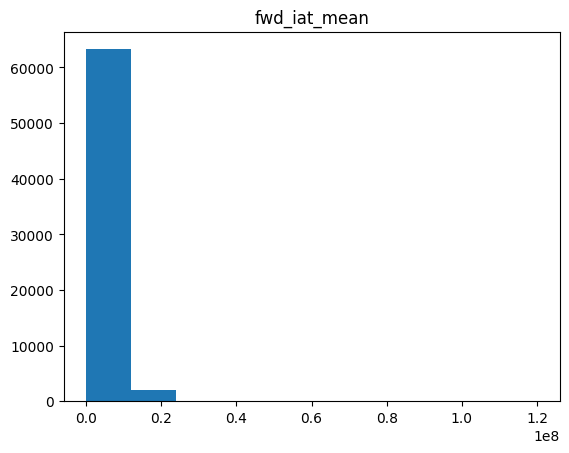

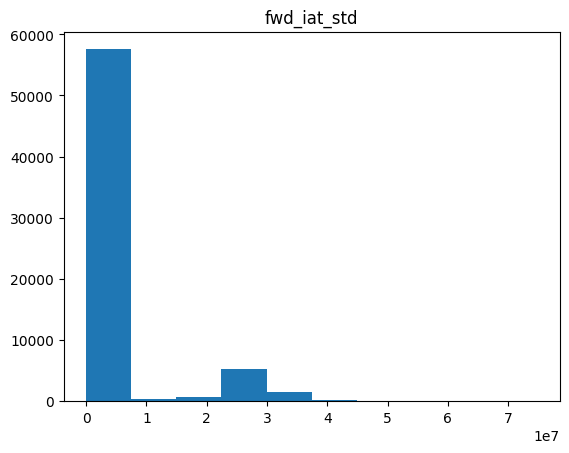

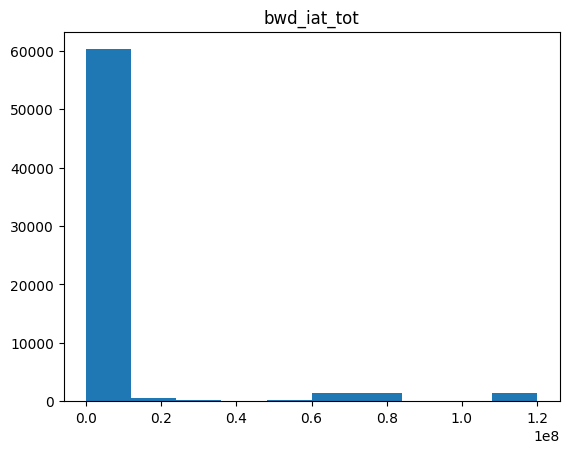

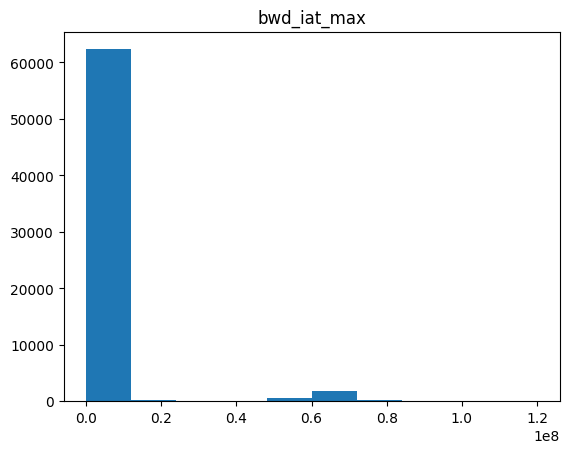

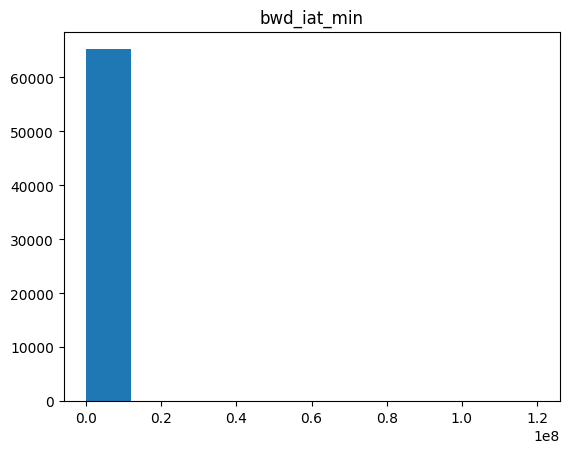

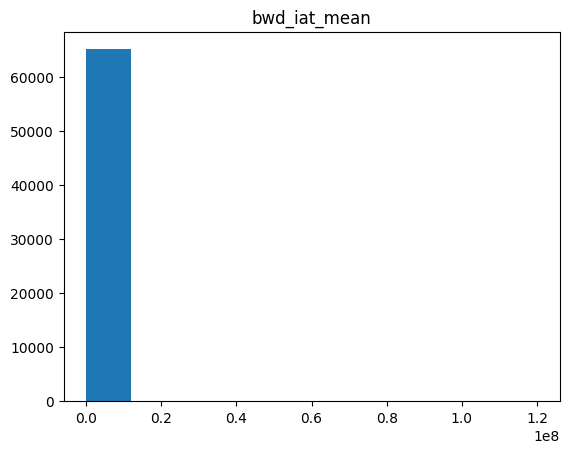

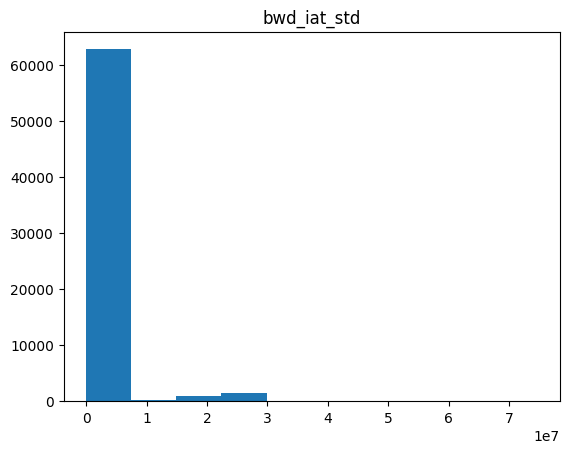

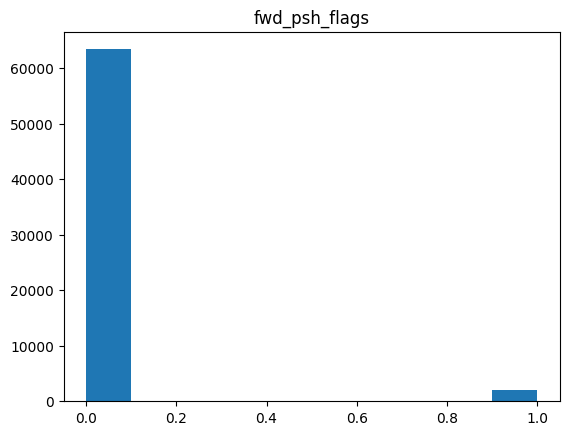

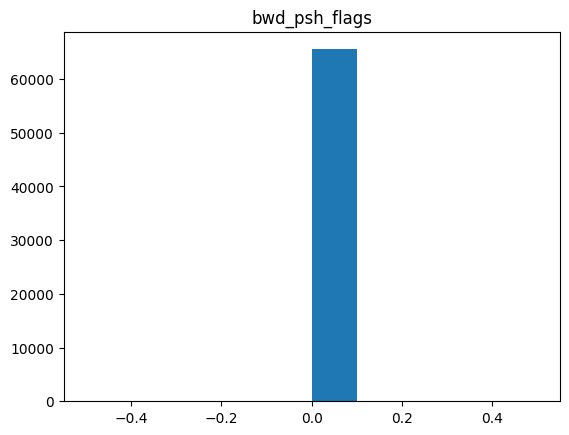

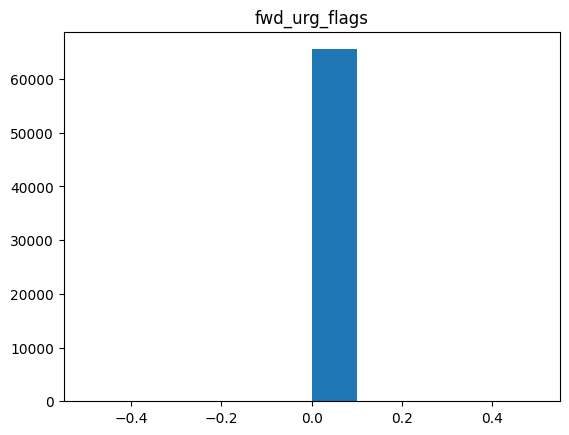

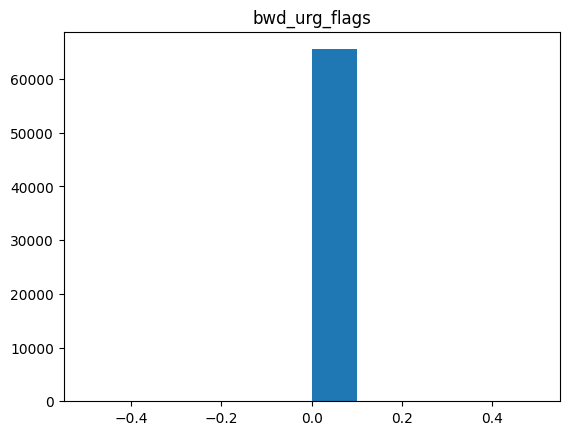

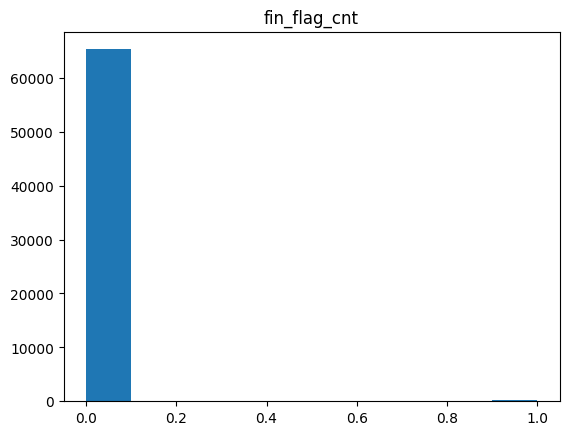

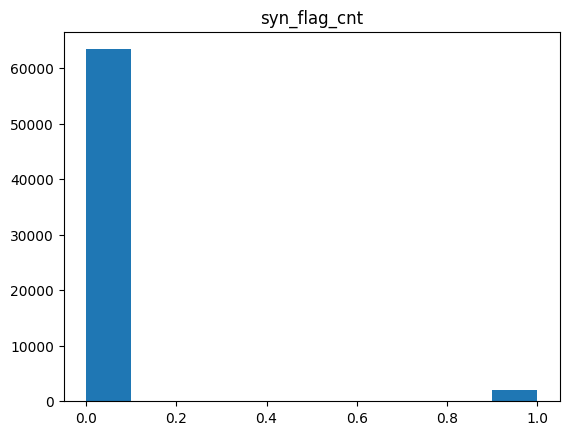

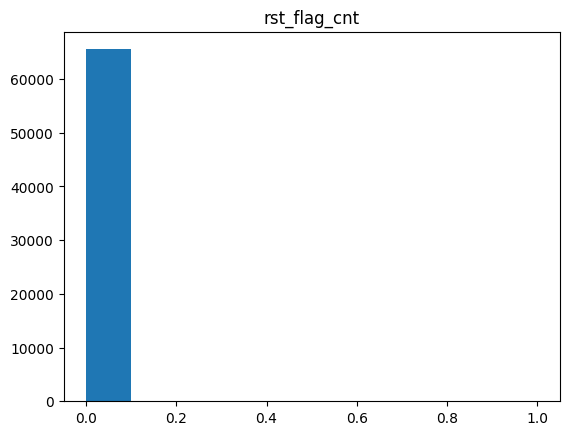

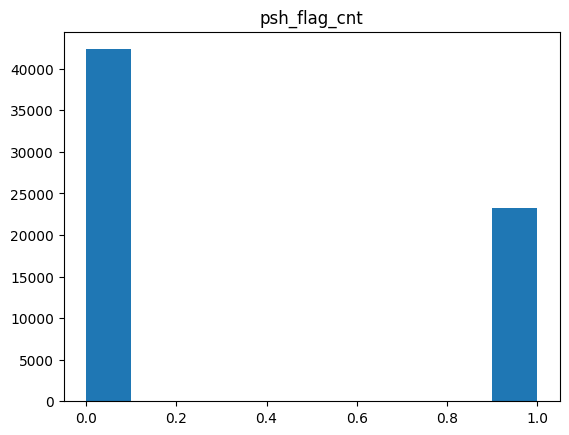

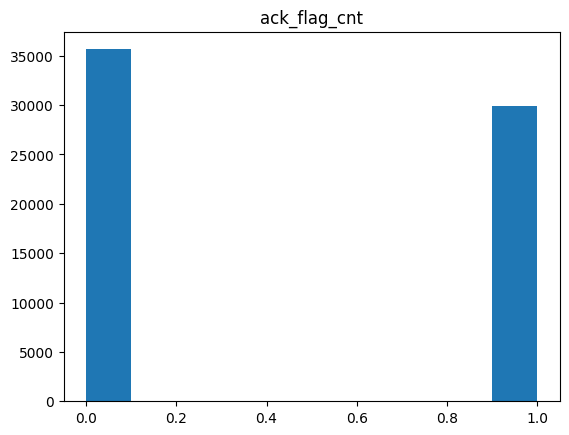

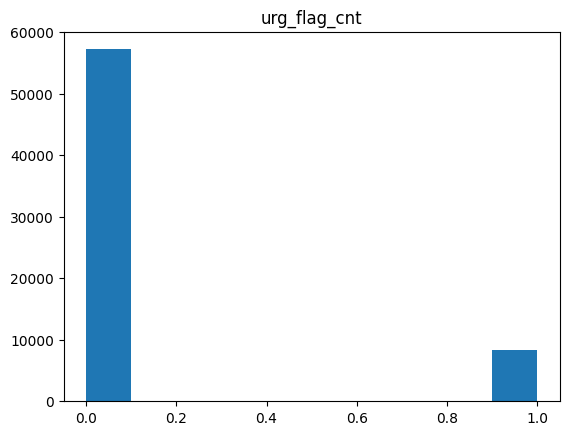

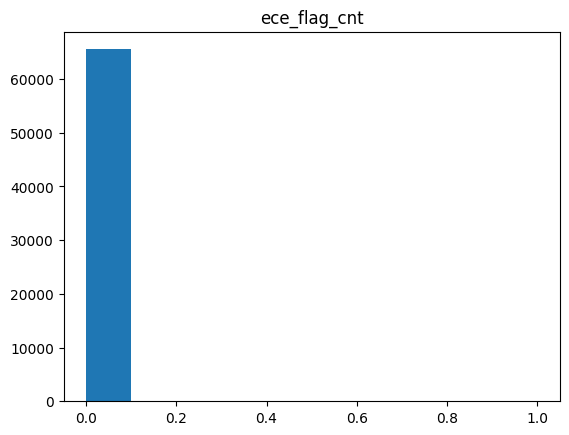

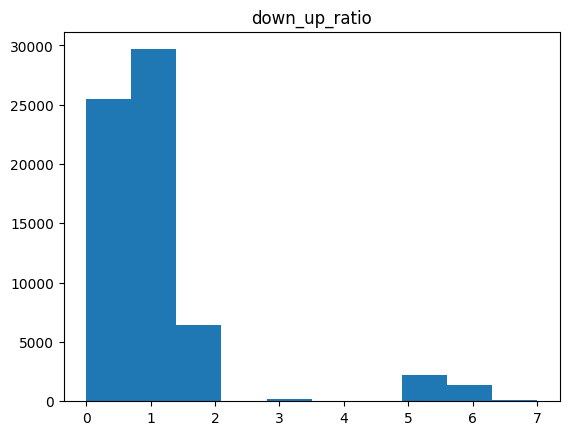

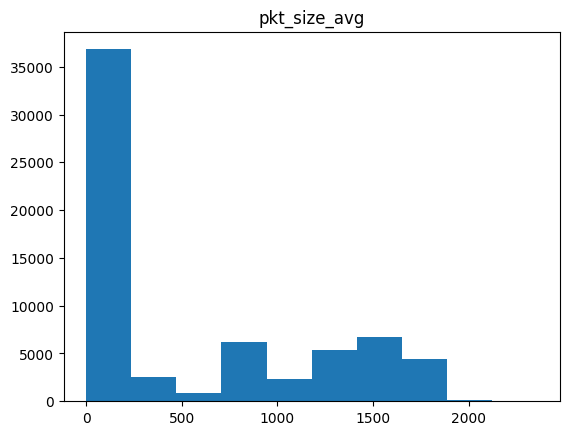

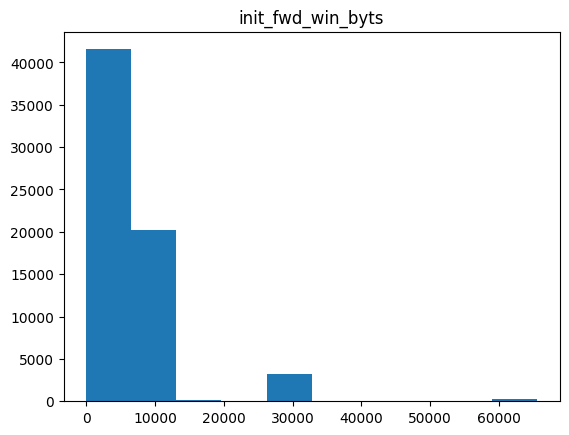

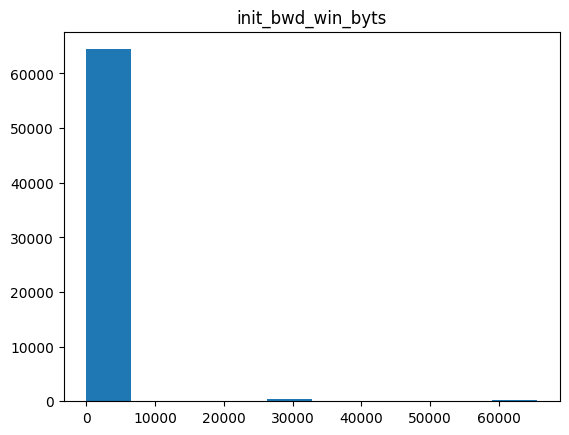

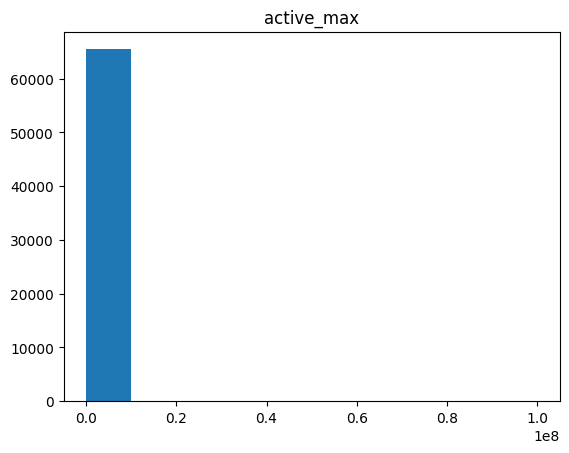

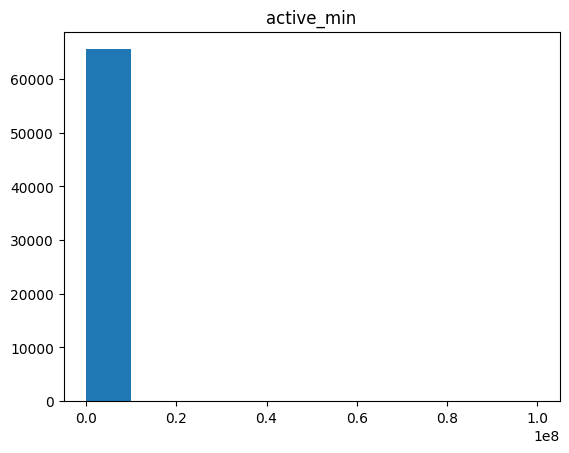

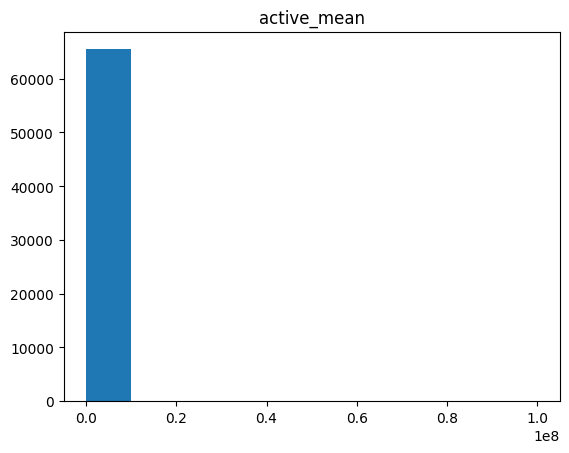

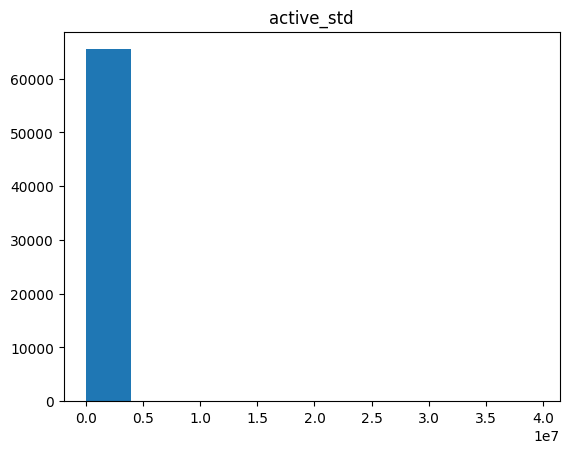

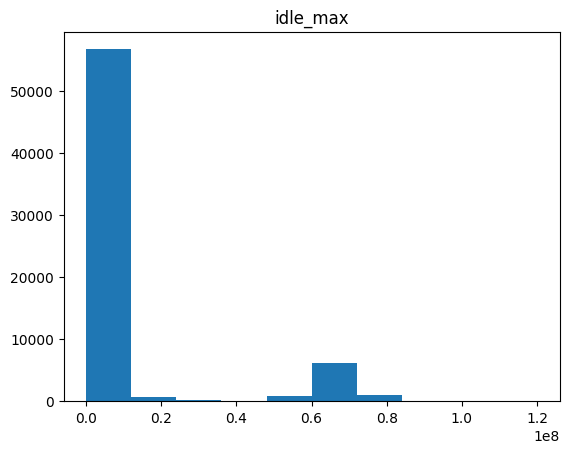

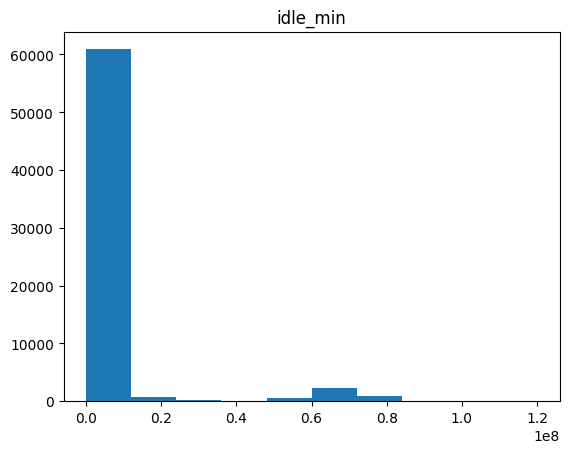

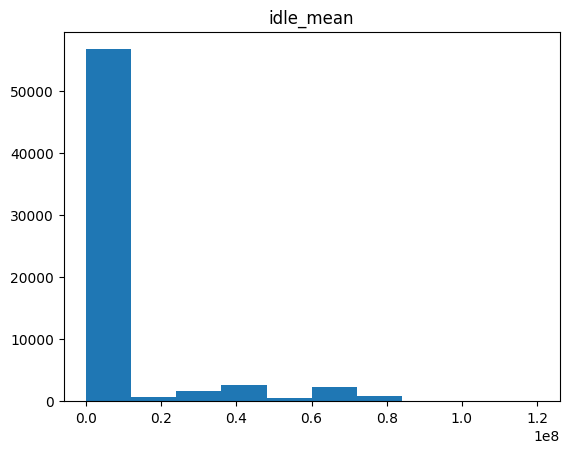

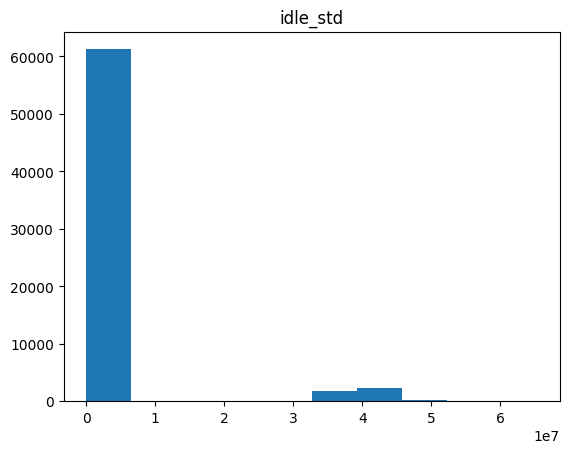

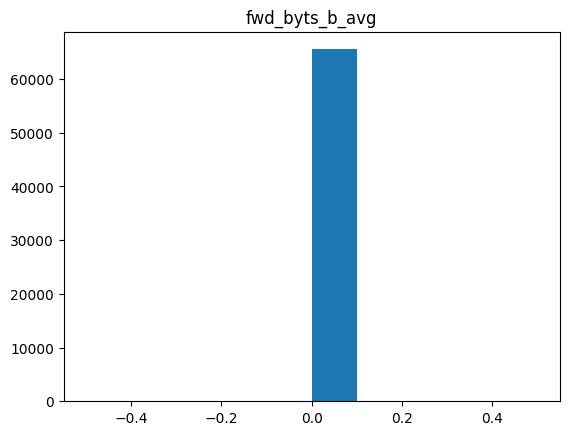

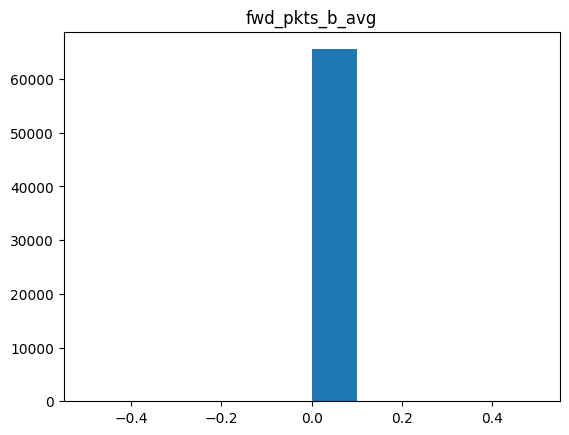

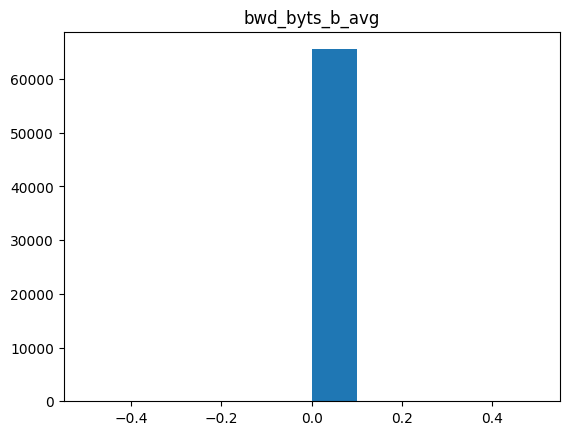

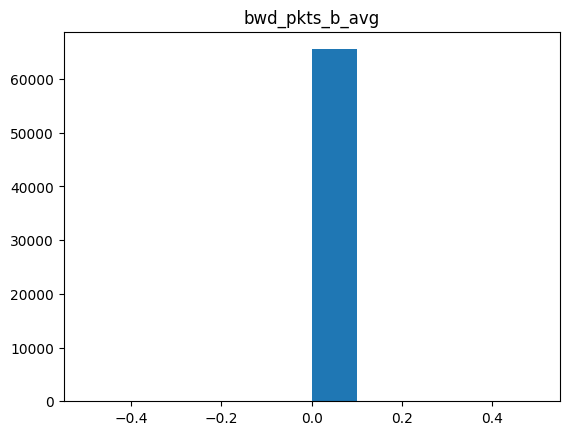

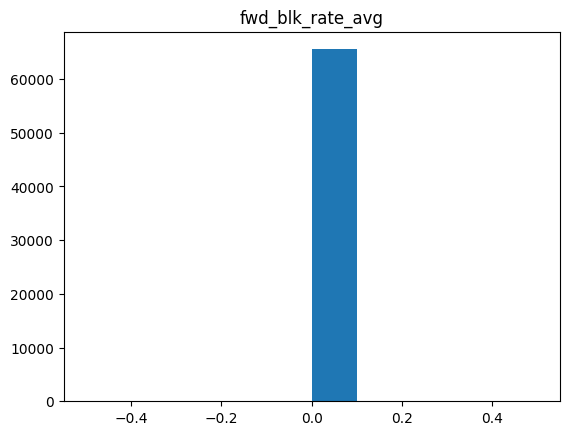

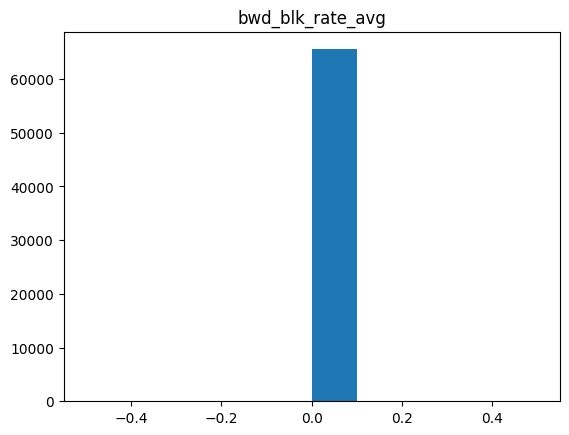

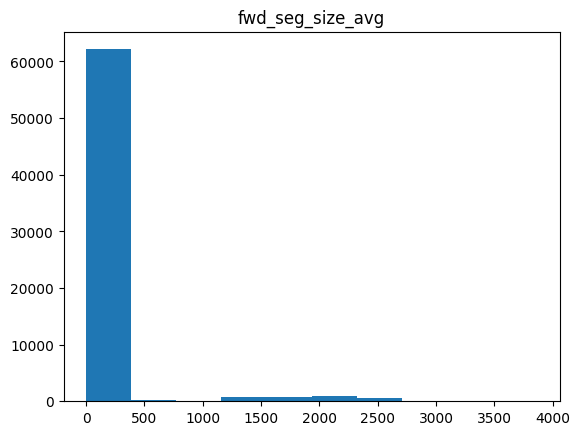

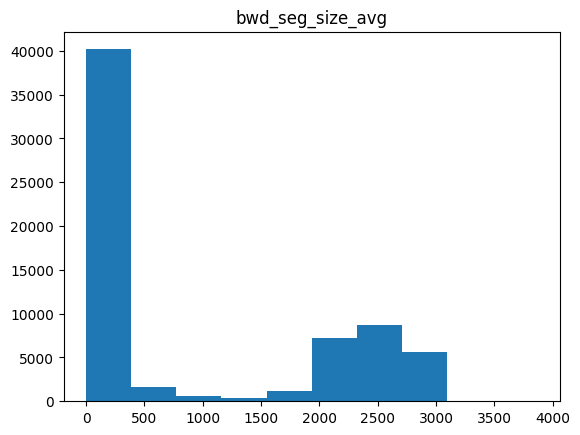

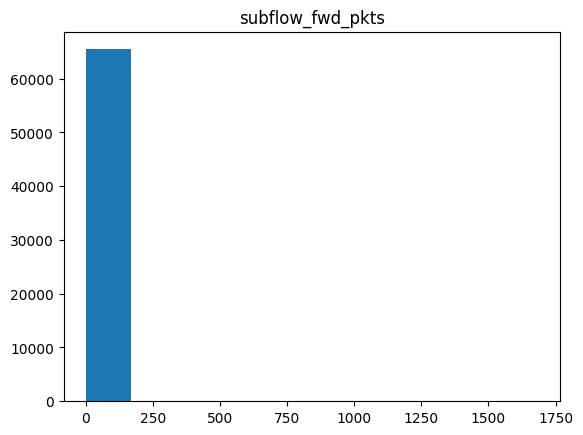

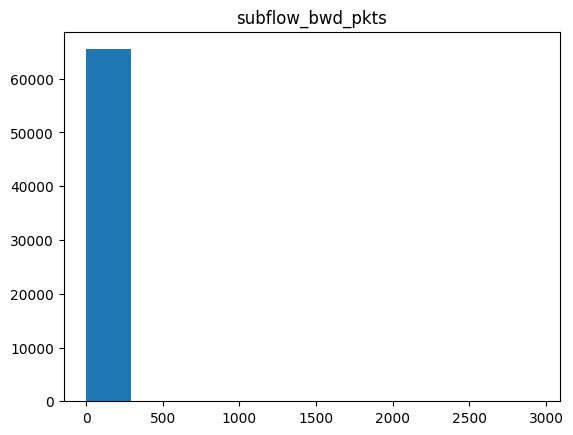

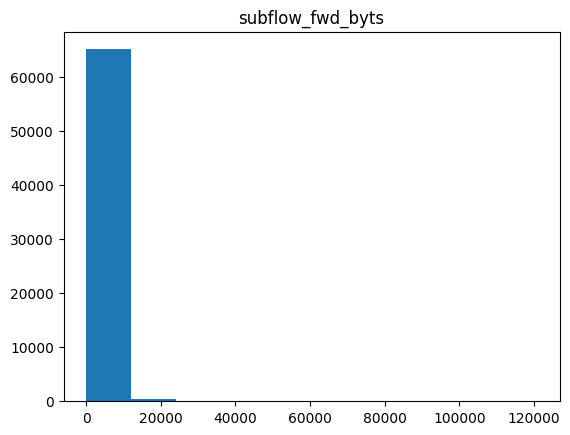

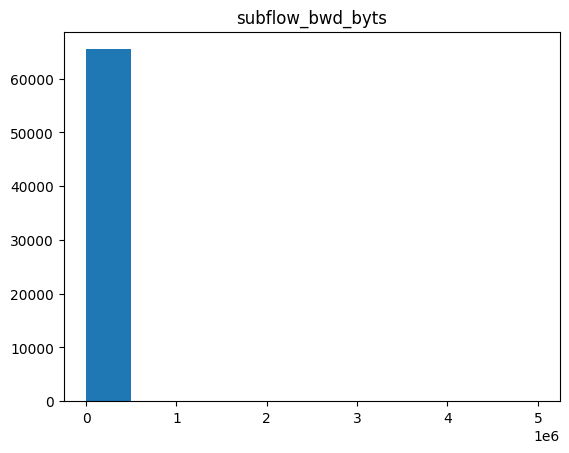

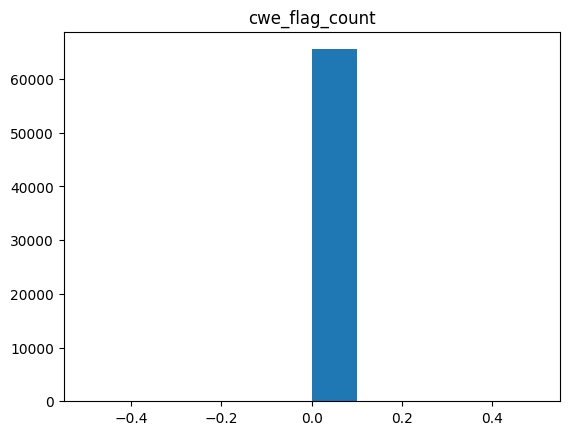

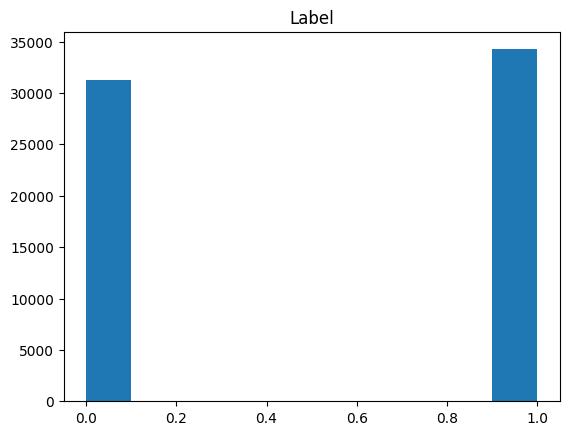

In [246]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

## Data splitting into train and test

In [247]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])



In [248]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [249]:
X

array([[ 2.87969732, -0.49063868,  0.12038764, ..., -0.21274951,
        -0.15769216,  0.        ],
       [ 2.89095593, -0.4906349 , -0.03396655, ..., -0.2145976 ,
        -0.15755081,  0.        ],
       [ 2.8910155 , -0.49063693, -0.02917798, ..., -0.2145976 ,
        -0.15755081,  0.        ],
       ...,
       [-0.38381056, -0.23699673, -0.0383349 , ..., -0.20720525,
        -0.15769216,  0.        ],
       [-0.38381056, -0.23699619, -0.0383349 , ..., -0.20720525,
        -0.15769216,  0.        ],
       [-0.38381056, -0.27217755, -0.03833491, ..., -0.20905334,
        -0.15769216,  0.        ]])

In [250]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (52426, 77)
The test dataset size =  (13107, 77)


# ----------------------------Training the model-------------------------------- 

### Random Forest

In [251]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

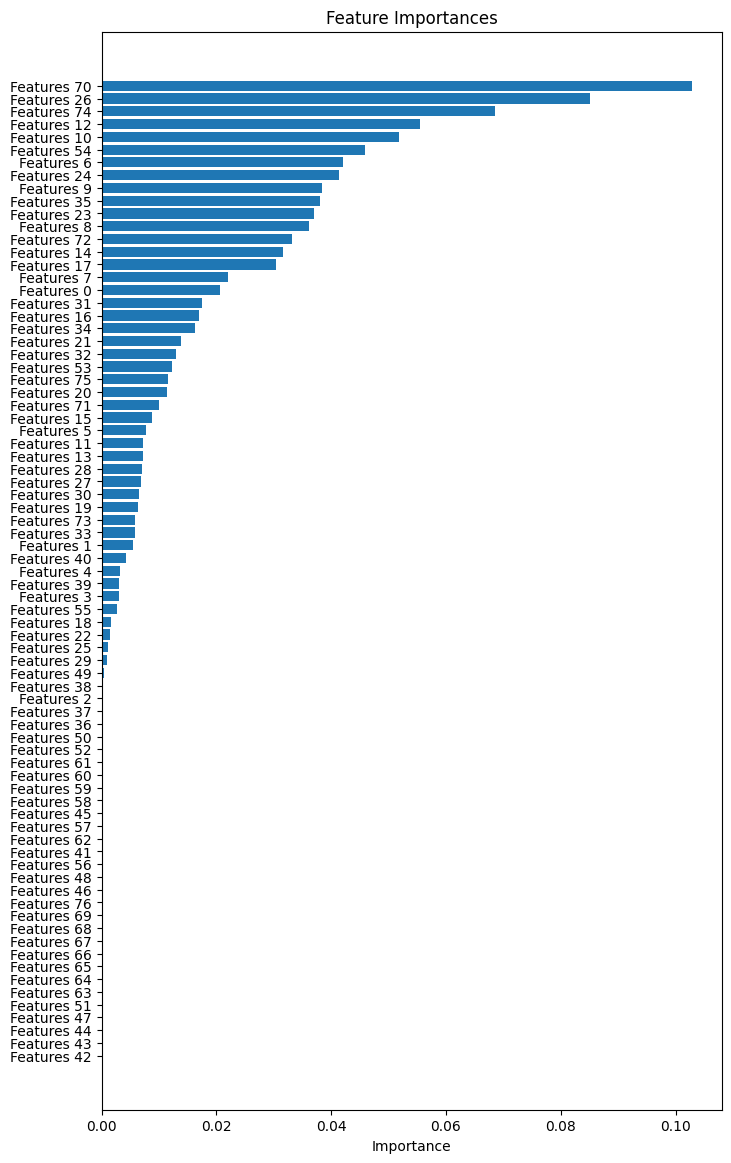

In [252]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

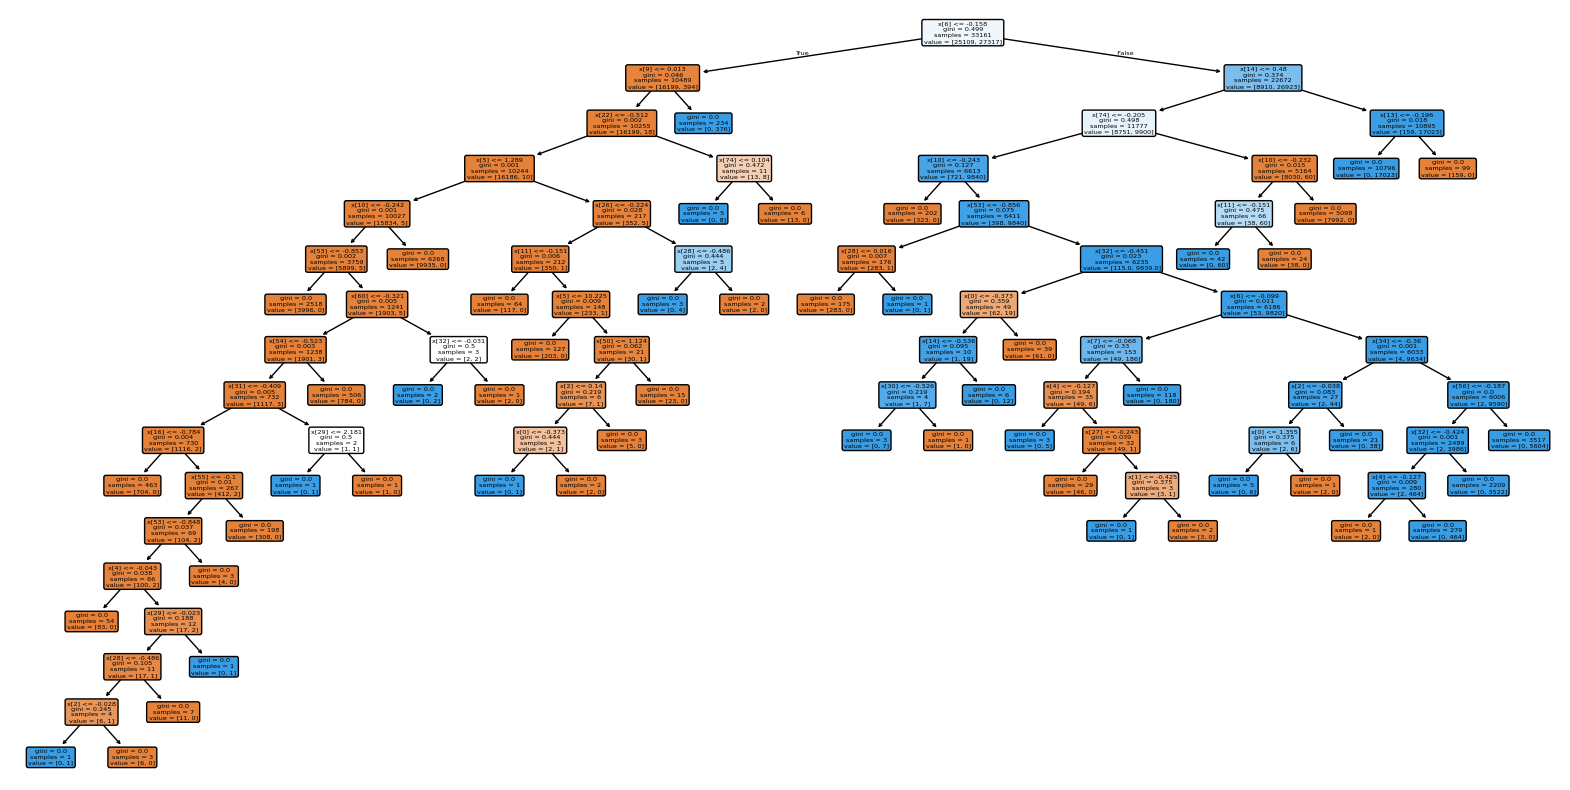

In [253]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation 

In [254]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [255]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9997
F1 Score: 0.9997
Precision: 0.9999
Recall: 0.9996


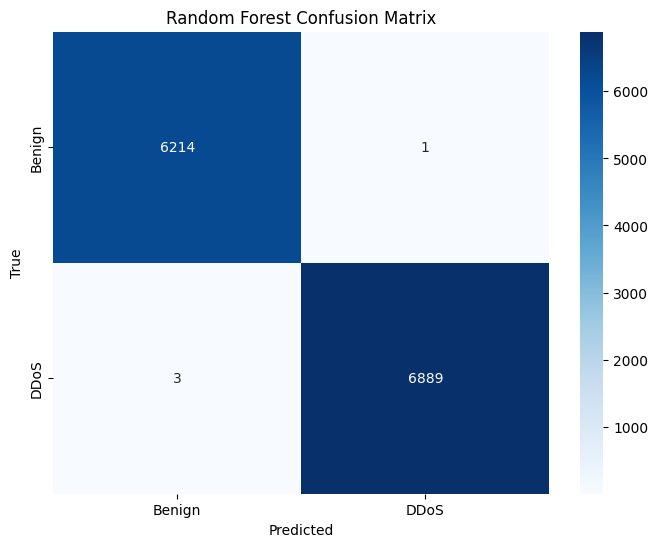

In [256]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

### Logistic Regression

In [257]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

### Evaluate Logistic Regression

In [258]:

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [259]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')




Logistic Regression Metrics:
Accuracy: 0.9985
F1 Score: 0.9985
Precision: 0.9980
Recall: 0.9991


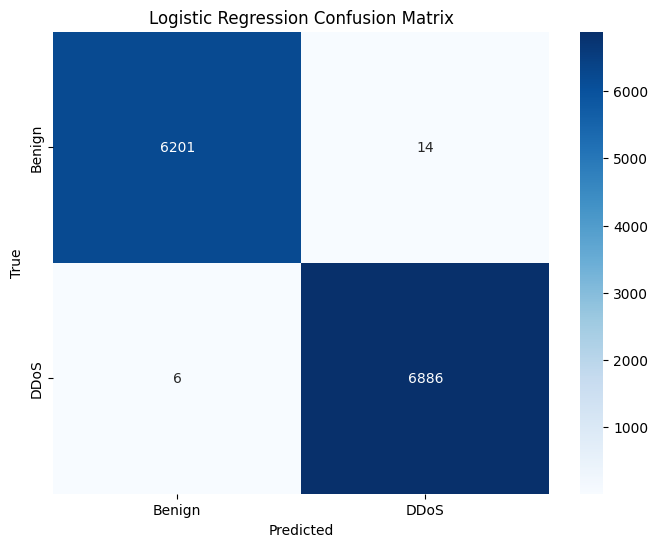

In [260]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


### Neural Network

In [261]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

C:\Users\Abhij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### # Evaluate Neural Network

In [262]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9987
F1 Score: 0.9988
Precision: 0.9978
Recall: 0.9997


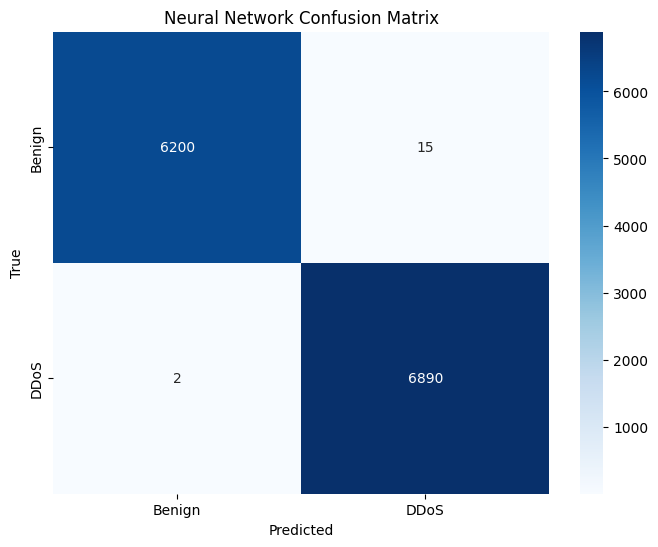

In [263]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## Model Comparison

In [264]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)


In [265]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


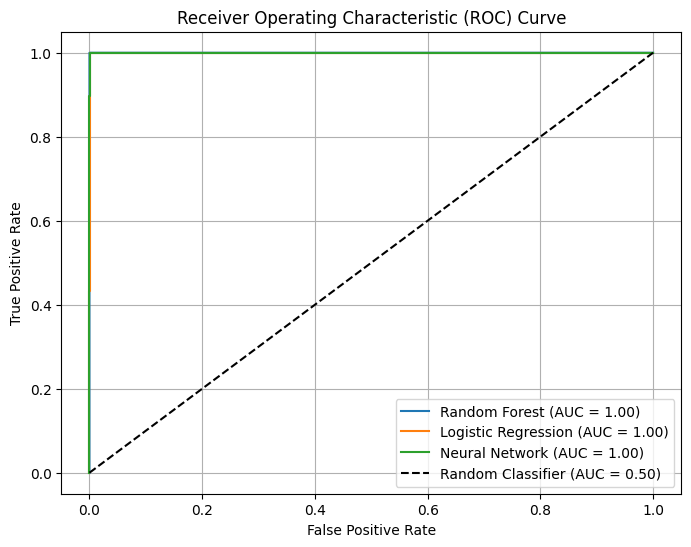

In [266]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [267]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'ddos_detection_model.pkl')


['ddos_detection_model.pkl']

In [268]:
# Path to your CSV file
csv_file_path = 'captured_traffic.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)
# data = pd.read_csv()

def validate_and_prepare_data(data):
    """ 
    Validate and prepare data: check for extra and missing columns 
    compared to those used in model training.
    """
    # List of columns that were used during model training
    TRAINING_COLUMNS = [
        'dst_port', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 
        'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max', 
        'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 
        'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 
        'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean', 
        'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 
        'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 
        'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 
        'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 
        'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s', 
        'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean', 
        'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt', 
        'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 
        'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg', 
        'fwd_seg_size_avg', 'bwd_seg_size_avg', 
        'fwd_byts_b_avg', 'fwd_pkts_b_avg', 'fwd_blk_rate_avg', 
        'bwd_byts_b_avg', 'bwd_pkts_b_avg', 'bwd_blk_rate_avg', 
        'subflow_fwd_pkts', 'subflow_fwd_byts', 'subflow_bwd_pkts', 
        'subflow_bwd_byts', 'init_fwd_win_byts', 'init_bwd_win_byts', 
        'fwd_act_data_pkts', 'fwd_seg_size_min', 'active_mean', 
        'active_std', 'active_max', 'active_min', 'idle_mean', 
        'idle_std', 'idle_max', 'idle_min'
    ]

    


    # Ensure the 'Label' column is removed
    if 'Label' in data.columns:
        data = data.drop(columns=['Label'])

    # Get the columns from the uploaded CSV file
    csv_columns = data.columns.tolist()

    # Identify extra columns in the uploaded CSV that were not in training
    extra_columns = list(set(csv_columns) - set(TRAINING_COLUMNS))
    
    # Identify missing columns that were in training but are not in the CSV
    missing_columns = list(set(TRAINING_COLUMNS) - set(csv_columns))

    # Display the extra and missing columns
    if extra_columns:
        print(f"Extra columns in uploaded CSV: {extra_columns}")
    if missing_columns:
        print(f"Missing columns in uploaded CSV: {missing_columns}")

    # Remove the extra columns
    data = data.drop(columns=extra_columns, errors='ignore')

    # Add missing columns with default values (e.g., 0)
    for column in missing_columns:
        data[column] = 0  # Or some other default value based on your dataset

    return data

data = validate_and_prepare_data(data)
scaled_data = scaler.transform(data)



Extra columns in uploaded CSV: ['cwr_flag_count', 'protocol', 'timestamp', 'src_ip', 'src_port', 'dst_ip']
Missing columns in uploaded CSV: ['cwe_flag_count']


In [269]:
scaled_data

array([[ 0.18346854, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ],
       [ 0.18352811, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ],
       [ 0.18358768, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ],
       ...,
       [ 1.19054829, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ],
       [ 1.19060786, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ],
       [ 1.19066743, -0.49063879, -0.03833506, ..., -0.19858083,
        -0.15769216,  0.        ]])

In [270]:
# Use the model to make predictions
predictions = nn_model.predict(data)

# Output the predictions (replace with logic to display or use the results)
print(predictions)

# Example: Checking for DDoS attack in predictions
is_ddos_detected = 'Warning: DDoS Attack Detected' if 1 in predictions else 'System Healthy'
print(is_ddos_detected)


[0 0 0 ... 0 0 0]


C:\Users\Abhij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [271]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)